<a href="https://colab.research.google.com/github/ykitaguchi77/CongenitalGlaucoma_AI_project/blob/main/Calculate_age_pediatricGLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import glob
import os
import pandas as pd
import sys
import shutil
import numpy as np
import matplotlib.pyplot as plt

#google driveをcolabolatoryにマウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

def openCSV(csv_path, header):  #header: Noneあるいは行番号
    try:
        df = pd.read_csv(csv_path, encoding="shift-jis", header=header)
    except:
        try:
            df = pd.read_csv(csv_path, encoding="utf-8", header=header)
        except:
            df = pd.read_csv(csv_path, encoding="cp932", header=header)
    df = df.drop(df.columns[[0]], axis=1) #1列目を削除する
    #print(df)
    return df

#CSVを開く （csv1:対象のファイル、csv2:参照するファイル）
csv2_path = '/content/drive/MyDrive/Deep_learning/Facephoto_LIST/DiseaseInfo_all_connected_new3.csv'
df2 = openCSV(csv2_path, header=None) #CSVを開く

csv1_path = '/content/drive/MyDrive/研究/進行中の研究/先天性緑内障プロジェクト/result_Random_確認用.csv'
df1 = openCSV(csv1_path, header=0) #CSVを開く

pt_gla = df1.loc[df1["label"]==1]["path"].drop_duplicates().tolist() #label=1(gla)の列の"path"の行を抜き出し
gla_path_list = [i.rsplit("\\",1)[1] for i in pt_gla] #"F:\\先天性緑内障\\dataset_for_article_250px_2\\gla_ortho\\8492-4.jpg"の\\より右側を抜き出し
gla_id_list = [int(i.split(".")[0].split("-")[0].split("_")[0]) for i in gla_path_list] #8492-4.jpgあるいは8492_4.jpgの8492を抜き出し
gla_id_list = sorted(list(set(gla_id_list))) #リストから重複を削除

pt_cont = df1.loc[df1["label"]==0]["path"].drop_duplicates().tolist()
cont_path_list = [i.rsplit("\\",1)[1] for i in pt_cont]
cont_id_list = [int(i.split(".")[0].split("-")[0].split("_")[0]) for i in cont_path_list]
cont_id_list = sorted(list(set(cont_id_list)))

In [ ]:
df2

In [130]:
def extract(imgname_list, df_orig):
    #もとのcsvと列名を揃えたデータフレームを作成
    cols =  df_orig.columns
    df_dst = pd.DataFrame(index=[], columns=cols)

    for i in imgname_list:
        df_add = df_orig[df_orig.iloc[:,1] ==int(i)] #df_origの2列目がimagename_listと一致する行を抜き出す
        df_dst = pd.concat([df_dst, df_add]) #抜き出した行を連結していく
    return df_dst

df_gla = extract(gla_id_list, df2)
df_cont = extract(cont_id_list, df2)
df_gla
print(len(df_gla), len(df_cont))

35 676


#**Statistics for age**

cont
n=693
max: 0
min: 10
median: 3
mean: 3.533910533910534
sd: 2.7036832890049025

gla_init
n=35
max: 0
min: 9
median: 0
mean: 1.4
sd: 2.6479736981100004

gla
n=231
max: 0
min: 10
median: 3
mean: 3.705627705627706
sd: 2.86506899832135



Ttest_indResult(statistic=-0.7999110313892439, pvalue=0.42426767892519157)

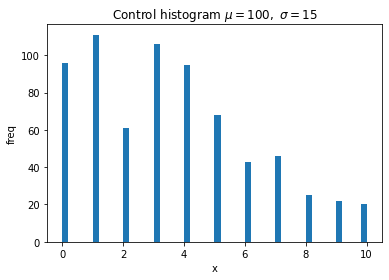

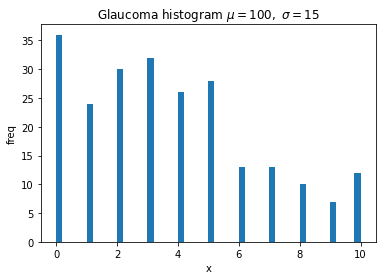

In [131]:
import statistics
import math
from scipy import stats
from statsmodels.stats.weightstats import ttest_ind
import random

def statistics_age(age_list):
    print("n=" +str(len(age_list)))
    print("max: "+str(min(age_list)))
    print("min: "+str(max(age_list)))
    print("median: "+str(statistics.median(age_list)))
    print("mean: "+str(statistics.mean(age_list)))
    print("sd: "+str(statistics.stdev(age_list)))

def correct_age(age_list):
    dst_list = [random.randint(0,10) if i>10 else i for i in age_list]
    return dst_list 

def per_image(age_list, img_num):
    dst_list = age_list
    while len(dst_list) < img_num:
        rand = random.randint(0,3)
        age = random.choice(dst_list) + rand
        dst_list.append(age)
    return dst_list
    
print("cont")
cont_age = df_cont.iloc[:,3].tolist() #年齢は3列目を参照する
cont_age = correct_age(cont_age) 
cont_age = per_image(cont_age, 693)
cont_age = correct_age(cont_age) 
statistics_age(cont_age)

print("")
print("gla_init")
gla_age = df_gla.iloc[:,3].tolist()
gla_age = correct_age(gla_age)  
statistics_age(gla_age)

print("")
print("gla")
gla_age = df_gla.iloc[:,3].tolist()
gla_age = correct_age(gla_age) 
gla_age = per_image(gla_age, 231)
gla_age = correct_age(gla_age) 
statistics_age(gla_age)




#cont histogram
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(cont_age, bins=50)
ax.set_title('Control histogram $\mu=100,\ \sigma=15$')
ax.set_xlabel('x')
ax.set_ylabel('freq')
fig.show()

#gla histogram
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(gla_age, bins=50)
ax.set_title('Glaucoma histogram $\mu=100,\ \sigma=15$')
ax.set_xlabel('x')
ax.set_ylabel('freq')
fig.show()


print("")
#Welchのt検定
stats.ttest_ind(cont_age, gla_age, equal_var=False)

#**Statistics for Gender**

In [132]:
def per_image(sex_list, img_num):
    dst_list = sex_list
    while len(dst_list) < img_num:
        rand = random.choice(dst_list)
        dst_list.append(rand)
    return dst_list

random.seed(12)

print("cont")
cont_sex = df_cont.iloc[:,4].tolist() #年齢は3列目を参照する
cont_sex = per_image(cont_sex, 693)
cont_male = sum(1 for i in cont_sex if i == "Male") 
cont_female = sum(1 for i in cont_sex if i == "Female") 
print(cont_male, cont_female)

print("gla_patient")
gla_sex = df_gla.iloc[:,4].tolist() #年齢は3列目を参照する
gla_male_patient = sum(1 for i in gla_sex if i == "Male") 
gla_female_patient = sum(1 for i in gla_sex if i == "Female") 
print(gla_male_patient, gla_female_patient)

print("gla")
gla_sex = df_gla.iloc[:,4].tolist() #年齢は3列目を参照する
gla_sex = per_image(gla_sex, 231)
gla_male = sum(1 for i in gla_sex if i == "Male") 
gla_female = sum(1 for i in gla_sex if i == "Female") 
print(gla_male, gla_female)


#クロス集計表 -> chi square test
df_cross = pd.DataFrame(
    [[cont_male,cont_female],[gla_male,gla_female]],
    index=['Cont', 'Gla'],
    columns=['Male', 'Female']
)

chi2, p, dof, ef =  stats.chi2_contingency(df_cross, correction=False)
chi2, p, dof, ef
print("chi統計量: {}".format(chi2))
print("p_value: {}".format(p))
print("自由度: {}".format(dof))
print("期待度数: {}".format(ef))



cont
339 354
gla_patient
18 17
gla
121 110
chi統計量: 0.8311844077961019
p_value: 0.361930268613849
自由度: 1
期待度数: [[345. 348.]
 [115. 116.]]


#**Stastistics for strabismus**

In [133]:

#クロス集計表 -> chi square test
df_cross = pd.DataFrame(
    [[20,60],[129,387],[82,246]],
    index=['Eso', 'Ortho', 'Exo'],
    columns=['Glaucoma', 'Control']
)

chi2, p, dof, ef =  stats.chi2_contingency(df_cross, correction=False)
chi2, p, dof, ef
print("chi統計量: {}".format(chi2))
print("p_value: {}".format(p))
print("自由度: {}".format(dof))
print("期待度数: {}".format(ef))

chi統計量: 0.0
p_value: 1.0
自由度: 2
期待度数: [[ 20.  60.]
 [129. 387.]
 [ 82. 246.]]
